In [1]:
%matplotlib notebook

In [2]:
import csv

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
def getData(csvfile, n):
    f = open(csvfile)
    rows = [row for row in csv.reader(f)]
    f.close()
    return mkDict([makeRow(row) for row in rows[1:n+1]])

In [6]:
def makeRow(row):
    for i in range(2, 12):
        row[i] = float(row[i])
    return row[0], row[1:]

In [7]:
def mkDict(data):
    d = {}
    for k, v in data:
        if k not in d:
            d[k] = {v[0]: v[1:]}
        else:
            d[k][v[0]] = v[1:]
    return d

In [8]:
data=getData('./benchmark-results.csv', 48)

In [9]:
import scipy.stats

In [10]:
colors = ['black', 'red', 'orange', 'blue', 'cyan', 'pink', 'purple']

In [11]:
def throughput(data):
    N = 7
    ind = np.arange(N)
    width = 0.2
    
    benchs = []
    baseline = []
    test = []
    multi = []
    for bench, instance in data.items():
        baseline.append(instance['julia'][7])
        test.append(instance['neptune1'][7])
        multi.append(instance['neptune5'][7])
        benchs.append(bench)
    benchs.append("geom")
    for l in [baseline, test, multi]:
        l.append(scipy.stats.gmean(l))
    plt.gcf().set_size_inches(8, 6, forward=True)
    ax = plt.axes()
    
    rects = []
    rects.append(ax.bar(ind, baseline, width, color='lightblue'))
    rects.append(ax.bar(ind + width, test, width, color='darkred'))
    rects.append(ax.bar(ind + 2 * width, multi, width, color='orange'))
    
    ax.set_ylabel('Throughput (MB/s)')
    ax.set_title('Throughput')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(benchs)
    ax.legend(rects, ['julia', 'neptune1', 'neptune5'], loc='upper right')
    plt.savefig('throughput.pdf', dpi=72, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


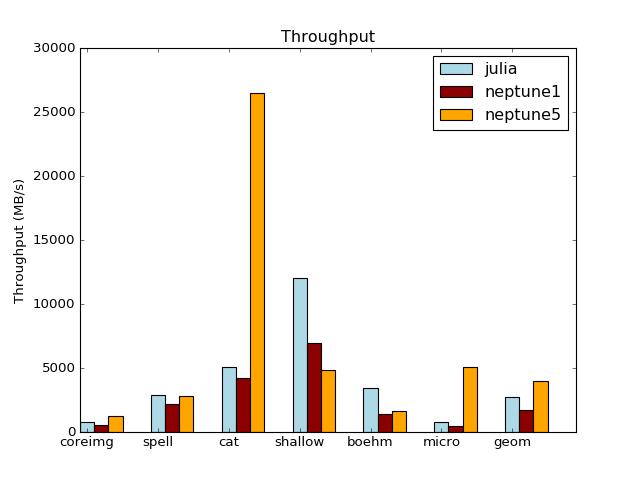

In [12]:
throughput(data)

In [28]:
def throughput_norm(data, bsl):
    N = 7
    ind = np.arange(N)
    width = 0.2
    
    benchs = []
    baseline = []
    test = []
    multi = []
    for bench, instance in data.items():
        b = instance[bsl][7]
        baseline.append(instance['julia'][7] / b)
        test.append(instance['neptune1'][7] / b)
        multi.append(instance['neptune5'][7] / b)
        benchs.append(bench)
    benchs.append("geom")
    for l in [baseline, test, multi]:
        l.append(scipy.stats.gmean(l))
    plt.gcf().set_size_inches(8, 6, forward=True)
    ax = plt.axes()
    
    rects = []
    rects.append(ax.bar(ind, baseline, width, color='lightblue'))
    rects.append(ax.bar(ind + width, test, width, color='darkred'))
    rects.append(ax.bar(ind + 2 * width, multi, width, color='orange'))
    
    ax.set_ylabel('Throughput (normalized)')
    ax.set_title('Normalized Throughput with Julia = 1')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(benchs)
    ax.legend(rects, ['julia', 'neptune1', 'neptune5'], loc='upper left')
    plt.savefig('throughput-normalized-%s.pdf' % bsl, dpi=72, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


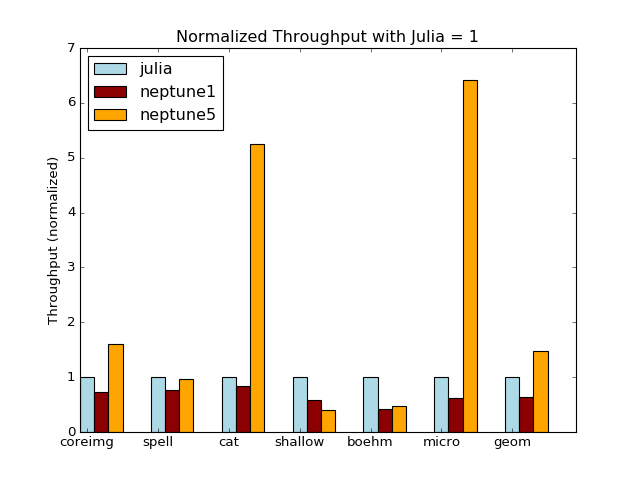

In [29]:
throughput_norm(data, 'julia')

In [30]:
def maxLatency(data):
    N = 7
    ind = np.arange(N)
    width = 0.25
    
    benchs = []
    baseline = []
    test = []
    multi = []
    for bench, instance in data.items():
        baseline.append(instance['julia'][6])
        test.append(instance['neptune1'][6])
        multi.append(instance['neptune6'][6])
        benchs.append(bench)
    benchs.append("geom")
    for l in [baseline, test, multi]:
        l.append(scipy.stats.gmean(l))
    plt.gcf().set_size_inches(8, 6, forward=True)
    
    ax = plt.axes()
    
    rects = []
    rects.append(ax.bar(ind, baseline, width, color='lightblue'))
    rects.append(ax.bar(ind + width, test, width, color='darkred'))
    rects.append(ax.bar(ind + 2 * width, multi, width, color='orange'))
    
    ax.set_ylabel('Max. latency (ms)')
    ax.set_title('Max. latency')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(benchs)
    ax.legend(rects, ['julia', 'neptune1', 'neptune7'], loc='lower left')
    plt.savefig('max-latency.pdf', dpi=72, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


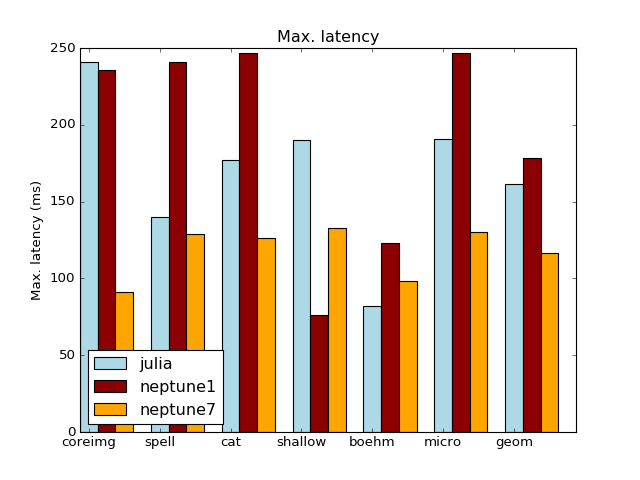

In [31]:
maxLatency(data)

In [22]:
def speedup(data, bsl):
    benchs = []
    speedup = []
    for bench, instance in data.items():
        sp = []
        baseline = instance[bsl]
        for i in range(1, 8):
            name = 'neptune%d' % i
            row = instance[name]
            sp.append(baseline[2] / row[2])
        speedup.append(sp)
        benchs.append(bench)
    
    plt.gcf().set_size_inches(8, 8, forward=True)
    ax = plt.axes()
    
    
    for bench, sp, color in zip(benchs, speedup, colors):
        ax.plot(range(1, 8), sp, color=color, linestyle='-', marker='o', label=bench)
        
    ax.plot(range(1, 8), np.ones(7), color='gray', linestyle='--')
    
    ax.set_ylabel('Speedup (%%GC Time)/(%%GC Time of %s)' % bsl)
    ax.set_title('Speedup')
    ax.set_xlabel('# threads')
    ax.legend(benchs, loc='upper left')
    plt.savefig('speedup-%s.pdf' % bsl, dpi=72, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


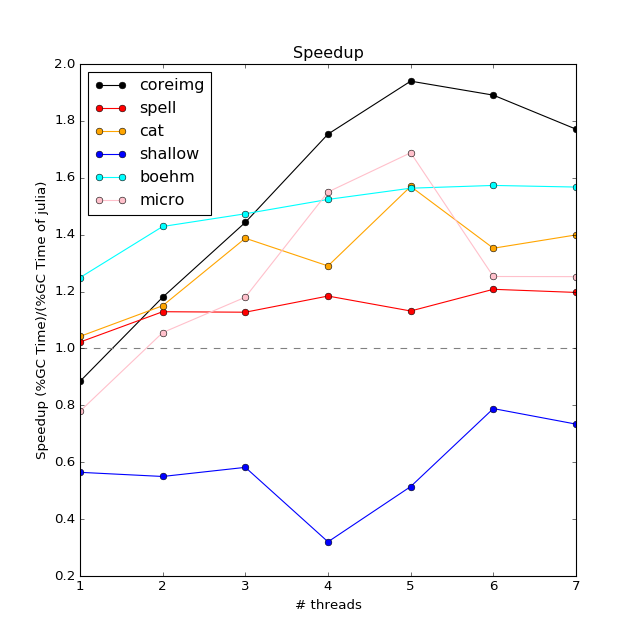

In [23]:
speedup(data, 'julia')

<IPython.core.display.Javascript object>


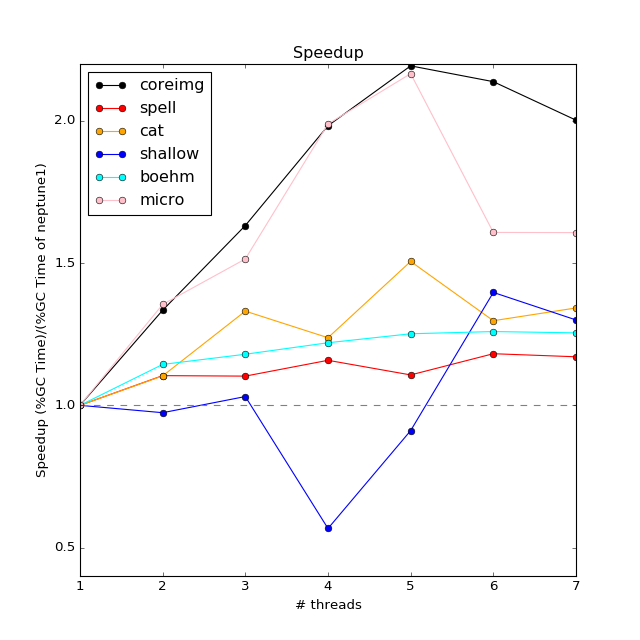

In [24]:
speedup(data, 'neptune1')

In [164]:
plt.savefig('speedupn1.pdf', dpi=72, bbox_inches='tight')

In [ ]:
plt.savefig('.pdf', dpi=72, bbox_inches='tight')

In [14]:
data

{'boehm': {'julia': [1.42,
   0.6,
   42.2535211268,
   66.0,
   33.0,
   6.3,
   82.0,
   3445.0,
   90.0,
   1.0],
  'neptune1': [4.05,
   1.37,
   33.8271604938,
   55.0,
   44.0,
   12.4,
   123.0,
   1427.0,
   111.0,
   4.0],
  'neptune2': [3.99,
   1.18,
   29.5739348371,
   47.0,
   52.0,
   10.7,
   106.0,
   1653.0,
   111.0,
   4.0],
  'neptune3': [4.08,
   1.17,
   28.6764705882,
   46.0,
   53.0,
   10.5,
   91.0,
   1679.0,
   111.0,
   4.0],
  'neptune4': [4.4,
   1.22,
   27.7272727273,
   45.0,
   54.0,
   11.0,
   109.0,
   1602.0,
   111.0,
   4.0],
  'neptune5': [4.44,
   1.2,
   27.027027027,
   44.0,
   55.0,
   10.8,
   96.0,
   1636.0,
   111.0,
   4.0],
  'neptune6': [5.51,
   1.48,
   26.8602540835,
   49.0,
   50.0,
   13.4,
   98.0,
   1318.0,
   111.0,
   4.0],
  'neptune7': [6.64,
   1.79,
   26.9578313253,
   47.0,
   52.0,
   16.1,
   126.0,
   1096.0,
   111.0,
   4.0]},
 'cat': {'julia': [42.8,
   6.42,
   15.0,
   66.0,
   33.0,
   4.78,
   177.0,
   